<a href="https://colab.research.google.com/github/Nasar1418/Machine-Learning/blob/main/Colab%20files/Project_3_Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
raw_mail_data=pd.read_csv('/content/mail_data.csv')

In [101]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
raw_mail_data.isnull().sum()

,0
Category,0
Message,0


In [103]:
raw_mail_data.fillna('',inplace=True)

In [104]:
raw_mail_data.shape

(5572, 2)

In [105]:
mail_data=raw_mail_data

In [106]:
mail_data.shape

(5572, 2)

In [107]:
# Label Encoding
mail_data.loc[mail_data['Category']=='spam','Category']=0
mail_data.loc[mail_data['Category']=='ham','Category']=1

In [108]:
# Data Separation
x=mail_data['Message']
y=mail_data['Category']

In [109]:
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [110]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=3)

In [111]:
print(x.shape,x_test.shape, x_train.shape)

(5572,) (1115,) (4457,)


In [112]:
# Transform text to feature vectors
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# Conver y_train to integers
y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [113]:
print(x_train)
print(x_train_features)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1,

In [114]:
# Model Training
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [115]:
x_train_prediction = model.predict(x_train_features)
x_train_accuracy = accuracy_score(x_train_prediction, y_train)

In [116]:
print(x_train_accuracy)

0.9676912721561588


In [118]:
# Model Evaluation
x_test_prediction = model.predict(x_test_features)
x_test_Accuracy = accuracy_score(x_test_prediction, y_test)

In [120]:
print(x_test_Accuracy)

0.9668161434977578


In [156]:
# Predictive System
# Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
# I've got it down to a tea. not sure which flavour

input_mail=["Free money free"]
input_data_features =feature_extraction.transform(input_mail)

input_prediction=model.predict(input_data_features)

if(input_prediction[0]==1):
  print("Ham Mail")
else:
  print("Spam Mail")

Spam Mail


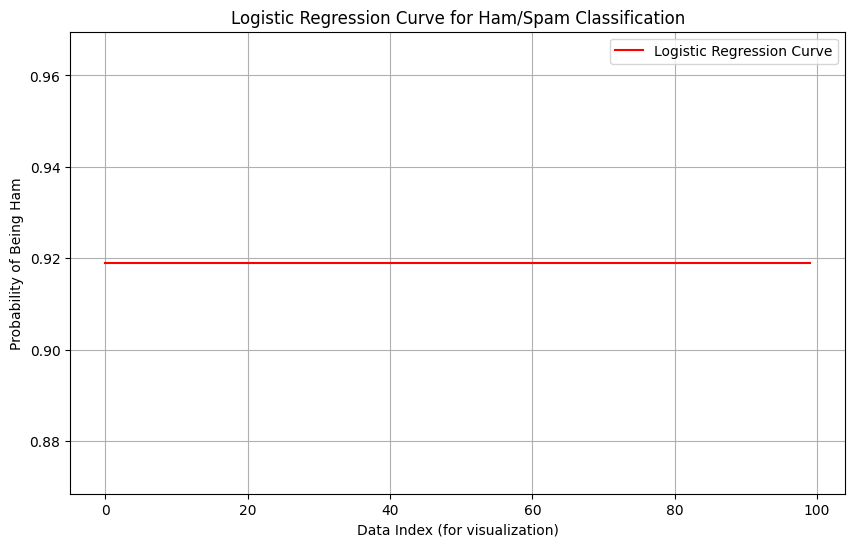

In [159]:
import matplotlib.pyplot as plt

# Assuming your model predicts probabilities:
# Create a range of values to test, based on the amount of values
x_range = 100 #You can adjust the number here for higher resolution
Xs = [i for i in range(x_range)]

# Reshape the input for correct model prediction.
Xs_reshape = np.array(Xs).reshape(-1, 1)
x_range_features = feature_extraction.transform([""]*x_range)

Ys = model.predict_proba(x_range_features)[:, 1]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(Xs, Ys, color='red', label='Logistic Regression Curve')
plt.xlabel("Data Index (for visualization)")
plt.ylabel("Probability of Being Ham")
plt.title("Logistic Regression Curve for Ham/Spam Classification")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# what is the meaning of above graph output